We already have built the dataset we are going to use. Now it's time to explore this final dataset in case there is any outlier or any transformation is required to later use on modeling. Here is the plan: 

- First visualization of our data. 
- Detect any outliers (there won't be many as our data is mostly categorical). 
- Visualize correlation. 
- Get insights and transform. 
- Encode (if necessary) our categorical columns. 
- Export two different datasets ready to be used on modeling. One for rating and other for revenue.

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We built up the dataset so we actually have [...]

In [2]:
movies_df = pd.read_csv("../data/processed/transformation/movies_transformed_list.csv", index_col=0)

### EDA

#### Exploratory

Let's start exploring our final dataset!

In [3]:
movies_df.head()

,index,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,0,False,/cGAm3MeVNf0JvrfXVPLDbhEmkpa.jpg,NaN,0,"['Thriller', 'Horror']",NaN,616801,tt10504248,en,...,0.0,['en'],In Production,NaN,The Northwoods,False,0.0,0,"['190895', '1198672']","['1459977', '1459977', '1470374', '1546613', '..."
1,1,False,/cGAm3MeVNf0JvrfXVPLDbhEmkpa.jpg,NaN,0,"['Thriller', 'Horror']",NaN,616801,tt10504248,en,...,0.0,['en'],In Production,NaN,The Northwoods,False,0.0,0,"['190895', '1198672']","['1459977', '1459977', '1470374', '1546613', '..."
2,2,False,NaN,NaN,0,"['Thriller', 'Crime']",NaN,602269,tt10016180,en,...,0.0,['en'],Post Production,NaN,The Little Things,False,0.0,0,"['5292', '17838', '7499', '95039', '118752', '...","['892', '5162', '7855', '8411', '54040', '5404..."
3,3,False,NaN,NaN,0,['Drama'],NaN,615777,tt10640346,en,...,0.0,['en'],Planned,NaN,Babylon,False,0.0,0,"['54693', '287', '2219', '5064', '135651']","['2219', '23485', '73453', '136495', '136495',..."
4,4,False,NaN,NaN,0,"['Western', 'Drama', 'Crime', 'Thriller', 'Mus...",NaN,618162,tt10696784,en,...,NaN,['en'],Planned,NaN,The Harder They Fall,False,0.0,0,"['1674162', '17605']","['2545', '46080', '52358', '84932', '1059578',..."


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 357
Data columns (total 28 columns):
index                    358 non-null int64
adult                    358 non-null bool
backdrop_path            64 non-null object
belongs_to_collection    67 non-null object
budget                   358 non-null int64
genres                   358 non-null object
homepage                 59 non-null object
id                       358 non-null int64
imdb_id                  358 non-null object
original_language        358 non-null object
original_title           358 non-null object
overview                 332 non-null object
popularity               358 non-null float64
poster_path              208 non-null object
production_companies     358 non-null object
production_countries     358 non-null object
release_date             278 non-null object
revenue                  358 non-null int64
runtime                  296 non-null float64
spoken_languages         358 non-null object
st

In [5]:
movies_df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,358.000000,3.580000e+02,358.000000,358.000000,358.0,296.000000,358.000000,358.000000
mean,178.500000,3.648327e+06,565212.145251,3.560441,0.0,10.354730,0.061453,0.047486
std,103.489935,2.731638e+07,110323.511288,3.003280,0.0,30.808526,0.691380,0.479825
min,0.000000,0.000000e+00,76600.000000,0.600000,0.0,0.000000,0.000000,0.000000
25%,89.250000,0.000000e+00,507086.000000,0.691000,0.0,0.000000,0.000000,0.000000
50%,178.500000,0.000000e+00,597925.500000,2.985500,0.0,0.000000,0.000000,0.000000
75%,267.750000,0.000000e+00,641281.500000,5.286000,0.0,0.000000,0.000000,0.000000
max,357.000000,3.870000e+08,711652.000000,17.605000,0.0,145.000000,10.000000,6.000000


From previous exploratory we see we got many categorical values which are not worth investigating, we will remove them on the next step.

In [8]:
columns_to_remove = ["backdrop_path", "belongs_to_collection", "homepage", "index", "imdb_id", "id", "poster_path", "tagline", "status_code", "status_message"]

In [9]:
movies_df.drop(columns_to_remove, axis=1, inplace=True)

#### Numerical columns

We can see some object columns actually are numeric. We will convert to numeric here.

In [10]:
columns_to_numeric = ["budget", "popularity", "popularity"]

for column in columns_to_numeric:
    pd.to_numeric(movies_df.budget, errors='coerce')

#### Boolean columns

We can see some object columns actually are numeric. We will convert to numeric here.

In [11]:
columns_to_bool = ["adult", "video"]

for column in columns_to_bool:
    movies_df[column] = movies_df[column].apply(lambda x: True if x == "True" else False)

In [12]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 357
Data columns (total 20 columns):
adult                   358 non-null bool
budget                  358 non-null int64
genres                  358 non-null object
original_language       358 non-null object
original_title          358 non-null object
overview                332 non-null object
popularity              358 non-null float64
production_companies    358 non-null object
production_countries    358 non-null object
release_date            278 non-null object
revenue                 358 non-null int64
runtime                 296 non-null float64
spoken_languages        358 non-null object
status                  358 non-null object
title                   358 non-null object
video                   358 non-null bool
vote_average            358 non-null float64
vote_count              358 non-null int64
cast                    358 non-null object
crew                    358 non-null object
dtypes: bool(2), fl

#### NaN Detection

Before visualizing our NaNs, we will transform all empty arrays we got to better our Nans.

In [13]:
movies_df = movies_df.replace('[]', np.NaN)

In [14]:
movies_df.shape

(358, 20)

In [15]:
print(f"Percentage of NaNs: \n{(movies_df.isna().sum() / len(movies_df)) * 100}")

Percentage of NaNs: 
adult                    0.000000
budget                   0.000000
genres                  14.245810
original_language        0.000000
original_title           0.000000
overview                 7.262570
popularity               0.000000
production_companies    20.391061
production_countries    19.273743
release_date            22.346369
revenue                  0.000000
runtime                 17.318436
spoken_languages        15.642458
status                   0.000000
title                    0.000000
video                    0.000000
vote_average             0.000000
vote_count               0.000000
cast                    28.491620
crew                    11.452514
dtype: float64


Big numbers 😱. Let's go case by case.

- `Genres`. Genres is a very important feature for us. In this case, we will **drop rows** where genres is missing.
- `Overview`. Overview will be removed as data here is not needed at all. 
- `Production Companies`. Almost half of our dataset. As it's not as important as genres, we will **remove this column**.
- `Prouction Countries`. Same as Production Companies, we will **remove this column**.
- `Release_date`. In this case, with no release date we cannot categorize by year. As we will after need it to select our cast, we will **drop rows** where release date is missing.
- `Runtime`. We can apply some techniques to keep our distribution on runtime, no need to drop any cell.
- `Spoken_languages`. After we **drop rows** from previous columns, we will see if we still keep a high number, if so, we will also remove the column.
- `Cast`. It's very important for us, more than genres. We will **drop rows** where cast is missing.
- `Crew`. As Spoken languages column, we will later see what we should do.

In [16]:
movies_df = movies_df.dropna(subset=['genres', 'release_date', 'cast', 'crew', 'spoken_languages'])

In [17]:
movies_df.shape

(183, 20)

In [18]:
movies_df.drop(["overview", "production_companies", "production_countries"], axis=1, inplace=True)

In [19]:
movies_df.genres.value_counts()

['Drama']                                                            11
['Action']                                                           10
['Comedy']                                                           10
['Action', 'Thriller']                                                8
['Action', 'Adventure', 'Fantasy']                                    7
                                                                     ..
['Drama', 'Science Fiction', 'Adventure', 'Action']                   1
['Adventure', 'Action', 'Fantasy']                                    1
['Action', 'Adventure', 'Science Fiction', 'Fantasy', 'Thriller']     1
['Adventure']                                                         1
['Documentary', 'Science Fiction']                                    1
Name: genres, Length: 76, dtype: int64

In [20]:
print(f"Percentage of NaNs: \n{(movies_df.isna().sum() / len(movies_df)) * 100}")

Percentage of NaNs: 
adult                0.000000
budget               0.000000
genres               0.000000
original_language    0.000000
original_title       0.000000
popularity           0.000000
release_date         0.000000
revenue              0.000000
runtime              2.185792
spoken_languages     0.000000
status               0.000000
title                0.000000
video                0.000000
vote_average         0.000000
vote_count           0.000000
cast                 0.000000
crew                 0.000000
dtype: float64


In [21]:
movies_df["runtime"].fillna(method='ffill', inplace=True)

In [22]:
movies_df.head()

,adult,budget,genres,original_language,original_title,popularity,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,cast,crew
0,False,0,"['Thriller', 'Horror']",en,The Northwoods,2.866,2021-01-01,0,0.0,['en'],In Production,The Northwoods,False,0.0,0,"['190895', '1198672']","['1459977', '1459977', '1470374', '1546613', '..."
1,False,0,"['Thriller', 'Horror']",en,The Northwoods,2.866,2021-01-01,0,0.0,['en'],In Production,The Northwoods,False,0.0,0,"['190895', '1198672']","['1459977', '1459977', '1470374', '1546613', '..."
2,False,0,"['Thriller', 'Crime']",en,The Little Things,3.315,2021-01-28,0,0.0,['en'],Post Production,The Little Things,False,0.0,0,"['5292', '17838', '7499', '95039', '118752', '...","['892', '5162', '7855', '8411', '54040', '5404..."
3,False,0,['Drama'],en,Babylon,4.613,2021-12-25,0,0.0,['en'],Planned,Babylon,False,0.0,0,"['54693', '287', '2219', '5064', '135651']","['2219', '23485', '73453', '136495', '136495',..."
6,False,0,['Drama'],en,Babylon,4.613,2021-12-25,0,0.0,['en'],Planned,Babylon,False,0.0,0,"['54693', '287', '2219', '5064', '135651']","['2219', '23485', '73453', '136495', '136495',..."


In [23]:
movies_df.shape

(183, 17)

After discovering some transformation needed our dataset required, we finally got 153,850 values. Down from 250,000.

### Target attribute

We already decided what is our target on classification......... We create a new column.

In [24]:
movies_df["success"] = movies_df["vote_average"].apply(lambda x: True if x > 8 else False)

#### Visualize data

#### Target attribute

In [25]:
print(movies_df.groupby('success').size())

success
False    183
dtype: int64


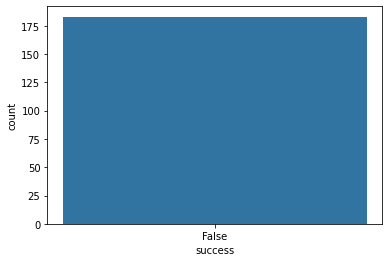

In [26]:
sns.countplot(movies_df['success'], label="Count")

Our data is unbalanced. Later we will need to use some techniques to balance it.

#### Visualize Correlations

(9.5, -0.5)

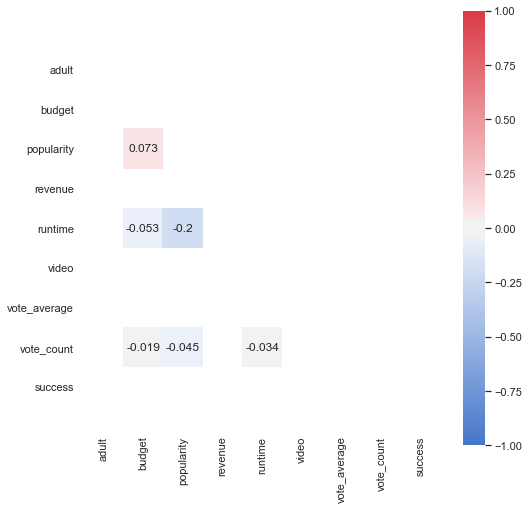

In [27]:
# Correlation Matrix Heatmap Visualization (should run this code again after removing outliers/zero values)
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(movies_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(8,8))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(movies_df.corr(), mask=mask, annot=True, square=True, cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [28]:
movies_df.head()

,adult,budget,genres,original_language,original_title,popularity,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,cast,crew,success
0,False,0,"['Thriller', 'Horror']",en,The Northwoods,2.866,2021-01-01,0,0.0,['en'],In Production,The Northwoods,False,0.0,0,"['190895', '1198672']","['1459977', '1459977', '1470374', '1546613', '...",False
1,False,0,"['Thriller', 'Horror']",en,The Northwoods,2.866,2021-01-01,0,0.0,['en'],In Production,The Northwoods,False,0.0,0,"['190895', '1198672']","['1459977', '1459977', '1470374', '1546613', '...",False
2,False,0,"['Thriller', 'Crime']",en,The Little Things,3.315,2021-01-28,0,0.0,['en'],Post Production,The Little Things,False,0.0,0,"['5292', '17838', '7499', '95039', '118752', '...","['892', '5162', '7855', '8411', '54040', '5404...",False
3,False,0,['Drama'],en,Babylon,4.613,2021-12-25,0,0.0,['en'],Planned,Babylon,False,0.0,0,"['54693', '287', '2219', '5064', '135651']","['2219', '23485', '73453', '136495', '136495',...",False
6,False,0,['Drama'],en,Babylon,4.613,2021-12-25,0,0.0,['en'],Planned,Babylon,False,0.0,0,"['54693', '287', '2219', '5064', '135651']","['2219', '23485', '73453', '136495', '136495',...",False


In [29]:
movies_df.to_csv("../data/processed/transformation/movies_explored_list.csv")

#### Insights

- adult columns is object instead of bool.
- Budget column was object instead of numeric.
- Many not useful data. We need to get rid of.
- Many null values. We need to remove the ones from release_date, runtime ffill?